In [1]:
# This file is used by web_gen.py to create a report for every FF chemical.  To make this work nicely,
# you should use the 'hide-input-all' nbextension and before running web_gen, enable hide all, save the sheet, 
#  and CLose and Halt.  

In [2]:
#preamble to analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.ticker
from IPython.display import Markdown as md
from time import sleep

In [3]:
df = pd.read_csv('data.csv',low_memory=False)
cas = df.loc[0].bgCAS
igname = df.loc[0].bgIngredientName
ehname = df.loc[0].eh_IngredientName

df.date = pd.to_datetime(df.date)
df['year'] = df.date.dt.year
df = df[df.year>2010]  # FF includes some old data but before 2011 are very sparse
tries = 0
md(f'# Summary report for {cas}:  {igname}')

# Summary report for 100-97-0:  1,3,5,7-tetraazatricyclo[3.3.1.13,7]decane

In [4]:
md(f'##  -- Elsner/Hoelzer name: {ehname}')

##  -- Elsner/Hoelzer name: Hexamethylenetetramine

In [5]:
md('**Raw FracFocus CASNumbers used:**')

**Raw FracFocus CASNumbers used:**

In [6]:
print(df.groupby('CASNumber')['bgCAS'].count())

CASNumber
000100-97-0       83
100-97-0       11867
100-97-0           1
Name: bgCAS, dtype: int64


In [7]:
md('**Raw FracFocus IngredientNames used:**')

**Raw FracFocus IngredientNames used:**

In [8]:
print(df.groupby('IngredientName')['bgCAS'].count())

IngredientName
 Hexamenthylenetetramine                        6
Acetic acid                                     1
HEXAMENTHYLENETETRAMINE                       409
HEXAMETHYLENETETRAMINE                        190
HEXAMETHYLENETETRAMNINE                         1
HEXAMETHYLENETRAMINE                            1
HEXAMETHYULENETETRAMINE                         2
HEXAMINE (HEXAMETHYLENETETRAMINE)               1
HEXANETHYLENETETRAMINE                          1
HEZAMETHYLENETETRAMINE                          1
Hexamenthylenetetramine                       157
Hexamethethylene Tetramine                     20
Hexamethlyenetetramine                         15
Hexamethlyenetetratmine                         1
Hexamethykenetetramine                          4
Hexamethyle netetramine                        12
Hexamethyle netramine                           1
Hexamethylebetetramine                          1
Hexamethyleneteramine                         171
Hexamethylenetetramine             

In [9]:
# get some global values
with open('ref.txt','r') as f:  passed_lines = f.readlines()

In [10]:
md(f'This report generated:  {passed_lines[2].split()[0].strip()}.')

This report generated:  2020-02-11.

In [11]:
md(f'Data generated from a {passed_lines[1].split()[0].strip()} FracFocus download.')

Data generated from a 2020-01-22 FracFocus download.

In [12]:
md('---')

---

In [13]:
# for nicer displays of numbers: round to significant figures.
from math import log10, floor
def round_sig(x, sig=2):
    try:
        if abs(x)>=1:
            out =  int(round(x, sig-int(floor(log10(abs(x))))-1))
            return f"{out:,d}" # does the right thing with commas
        else: # fractional numbers
            return str(round(x, sig-int(floor(log10(abs(x))))-1))
    except:
        return x


In [14]:
total_Upload = int(passed_lines[0].strip())

# Frequency of use

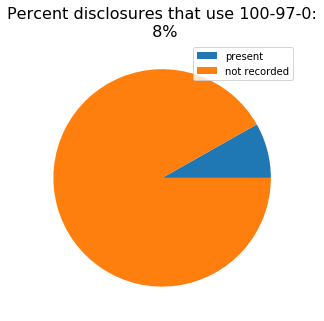

In [15]:
pres = len(df.UploadKey.unique())
massPres = len(df[df.bgMass>0].UploadKey.unique())
x = [pres,total_Upload-pres]
labels = ['present','not recorded']
plt.figure(figsize=(5, 5))
plt.pie(x)
plt.legend(labels=labels)
title = f'Percent disclosures that use {cas}:'
title += f'\n {round_sig(pres/total_Upload*100,3)}%'
plt.title(title,fontsize=16);
plt.show()

In [16]:
md(f'## ... and the percent that also have mass calculation: {round_sig(massPres/total_Upload*100,3)}%')

## ... and the percent that also have mass calculation: 6%

# Uses by Percent of the Fracking Job
This measure roughly shows a comparison of the concentration of the chemical in the whole fracking job (including the base fluid which is typically over 80%).  Only the disclosures where the sum of PercentHFJob is within 5% of 100% are plotted.

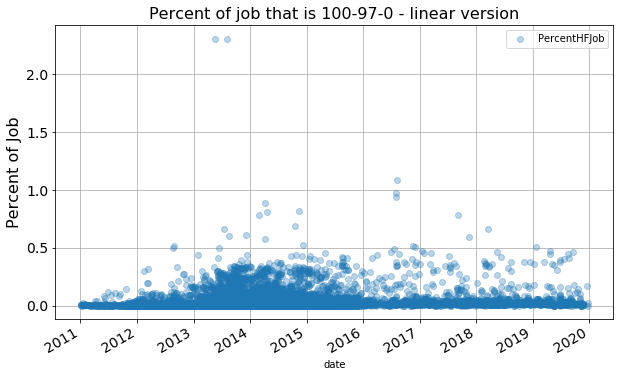

In [17]:
ax = df[df.record_flags.str.contains('%')].plot('date','PercentHFJob', style='o', alpha=.3,
            figsize=(10,6))
plt.ylabel('Percent of Job',fontsize=16);
plt.title(f'Percent of job that is {cas} - linear version',fontsize=16);
ax.grid()
ax.tick_params(axis="y", labelsize=14)
ax.tick_params(axis="x", labelsize=14)


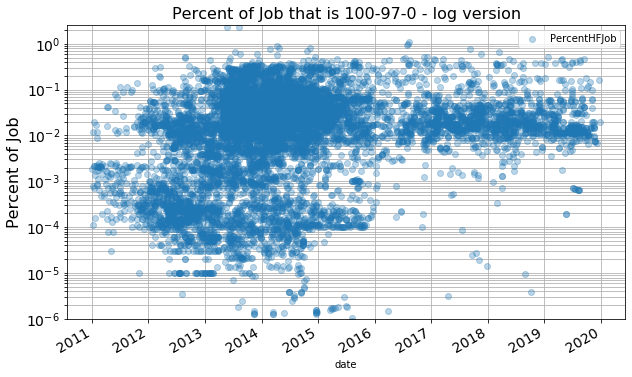

In [18]:
ax = df[df.record_flags.str.contains('%')].plot('date','PercentHFJob', style='o', alpha=.3,
            figsize=(10,6))
plt.ylabel('Percent of Job',fontsize=16);
plt.title(f'Percent of Job that is {cas} - log version',fontsize=16);
ax.set(yscale='log')
ax.tick_params(axis="y", labelsize=14)
ax.tick_params(axis="x", labelsize=14)
#locmaj = matplotlib.ticker.LogLocator(base=10,numticks=7,subs='all') 
locmaj = matplotlib.ticker.LogLocator(base=10,subs='all') 
ax.yaxis.set_major_locator(locmaj)
ax.set(ylim=(max(0.000001,df[df.record_flags.str.contains('%')].PercentHFJob.min()),
             df[df.record_flags.str.contains('%')].PercentHFJob.max()*1.1));
ax.grid()

# Uses by mass
This measure shows a comparison of the absolute quantity of a chemical used in a fracking job.

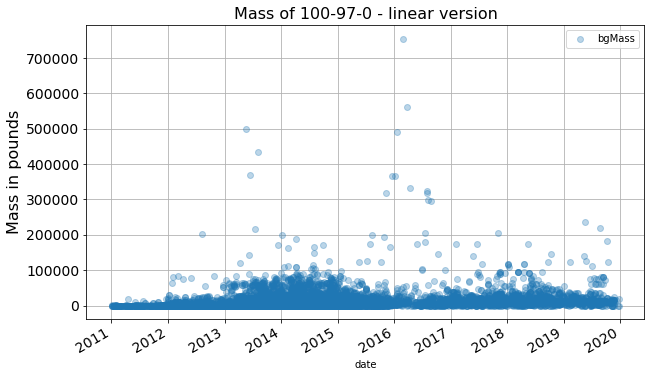

In [19]:
ax = df.plot('date','bgMass', style='o', alpha=.3,
            figsize=(10,6))
plt.ylabel('Mass in pounds',fontsize=16);
plt.title(f'Mass of {cas} - linear version',fontsize=16);
ax.grid()
ax.tick_params(axis="y", labelsize=14)
ax.tick_params(axis="x", labelsize=14)


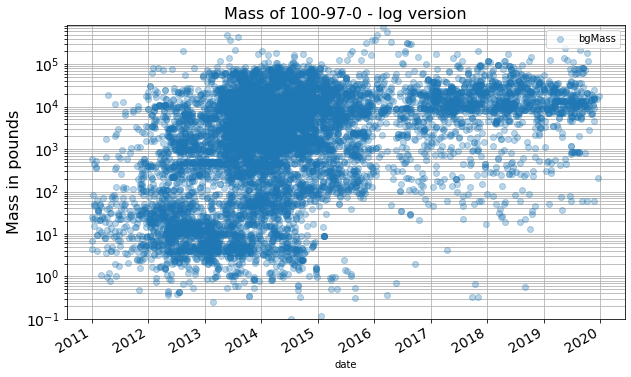

In [20]:
ax = df.plot('date','bgMass', style='o', alpha=.3,
            figsize=(10,6))
plt.ylabel('Mass in pounds',fontsize=16);
plt.title(f'Mass of {cas} - log version',fontsize=16);
ax.set(yscale='log')
ax.tick_params(axis="y", labelsize=14)
ax.tick_params(axis="x", labelsize=14)
#locmaj = matplotlib.ticker.LogLocator(base=10,numticks=7,subs='all') 
locmaj = matplotlib.ticker.LogLocator(base=10,subs='all') 
ax.yaxis.set_major_locator(locmaj)
ax.set(ylim=(max(0.1,df.bgMass.min()),df.bgMass.max()*1.1));
ax.grid()

# Which operators are the most frequent users?

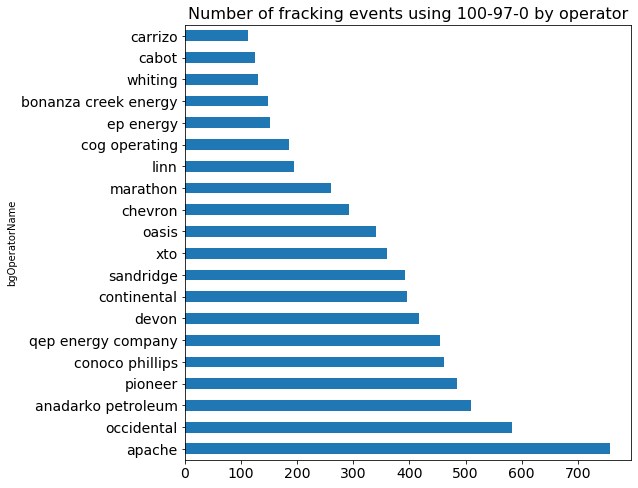

In [21]:
ax = df.groupby('bgOperatorName')['UploadKey'].count()\
     .sort_values(ascending=False)[:20].plot.barh(figsize=(8,8));
ax.tick_params(axis="y", labelsize=14)
ax.tick_params(axis="x", labelsize=14)
plt.title(f'Number of fracking events using {cas} by operator',fontsize=16);

# Which inferred service companies are the most frequent users?

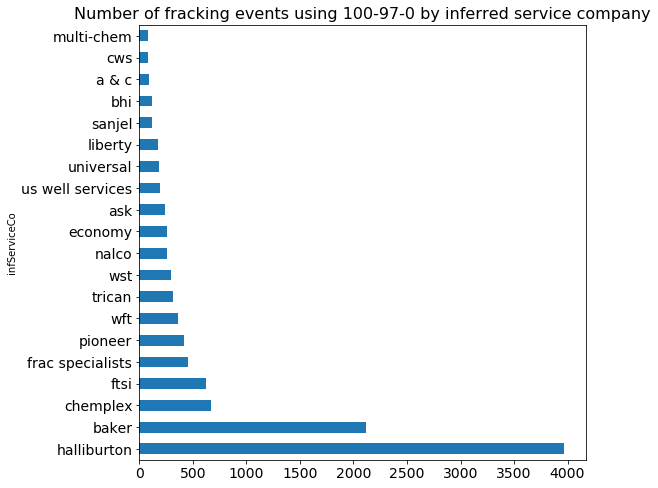

In [22]:
ax = df.groupby('infServiceCo')['UploadKey'].count()\
     .sort_values(ascending=False)[:20].plot.barh(figsize=(8,8));
ax.tick_params(axis="y", labelsize=14)
ax.tick_params(axis="x", labelsize=14)
plt.title(f'Number of fracking events using {cas} by inferred service company',fontsize=16);


# Who are the most frequent Suppliers?

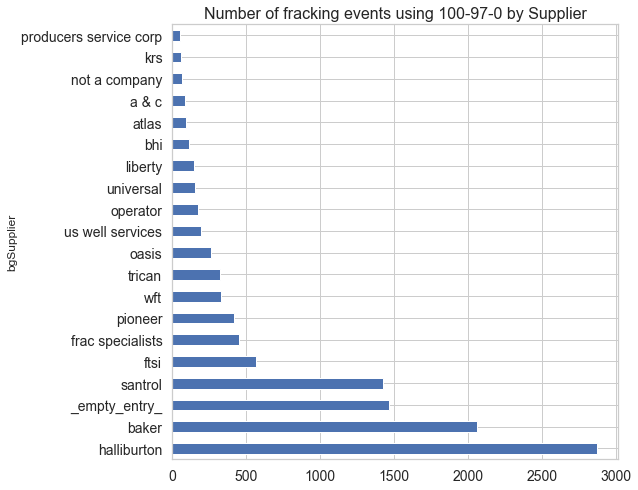

In [30]:
ax = df.groupby('bgSupplier')['UploadKey'].count()\
     .sort_values(ascending=False)[:20].plot.barh(figsize=(8,8));
ax.tick_params(axis="y", labelsize=14)
ax.tick_params(axis="x", labelsize=14)
plt.title(f'Number of fracking events using {cas} by Supplier',fontsize=16);


# Which operators use the most?

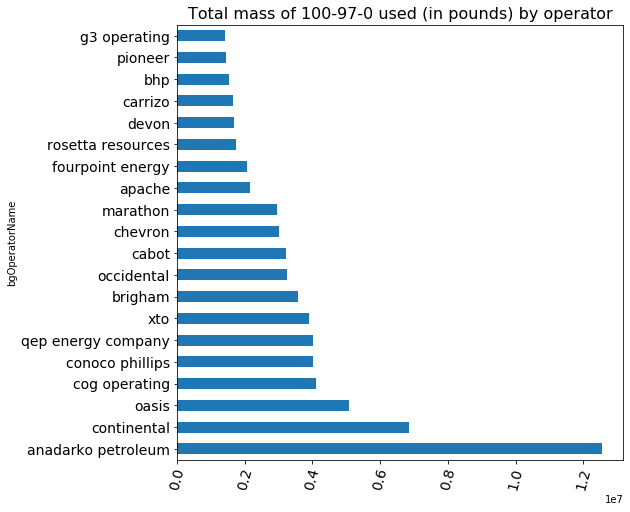

In [24]:
ax =df.groupby('bgOperatorName')['bgMass'].sum()\
     .sort_values(ascending=False)[:20].plot.barh(figsize=(8,8));
ax.tick_params(axis="y", labelsize=14)
ax.tick_params(axis="x", labelsize=14,rotation=75)
plt.title(f'Total mass of {cas} used (in pounds) by operator',fontsize=16);

# Some of the patterns of use

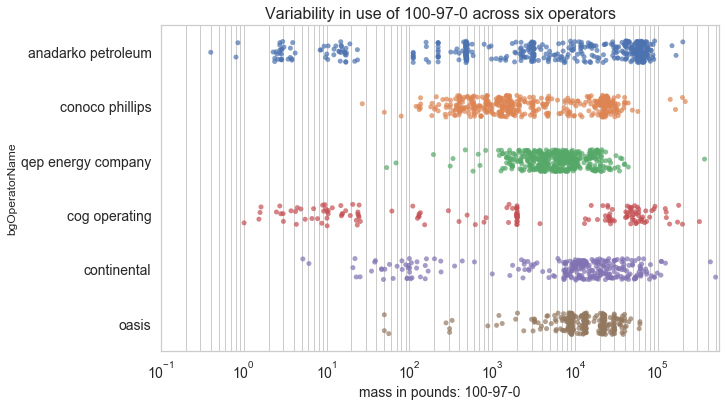

In [25]:
sns.set(style="whitegrid")
ops =df.groupby('bgOperatorName',as_index=False)['bgMass'].sum().sort_values(by='bgMass',
                                                                             ascending=False)[:6].bgOperatorName.tolist()
#print(ops)
t = df[df.bgOperatorName.isin(ops)]
#print(len(t))
t = t[t.record_flags.str.contains('M')]
fig = plt.figure(figsize=(10,6))
ax = sns.stripplot(t.bgMass,t.bgOperatorName,jitter=.2,alpha=.7)
plt.xlabel(f'mass in pounds: {cas}',fontsize=14);
plt.title(f'Variability in use of {cas} across six operators',fontsize=16)
ax.set(xscale='log')
ax.set(xlim=(max(0.1,t.bgMass.min()),t.bgMass.max()*1.1))
ax.tick_params(axis="x", labelsize=14)
ax.tick_params(axis="y", labelsize=14)
locmaj = matplotlib.ticker.LogLocator(base=10,subs='all') 
ax.xaxis.set_major_locator(locmaj)

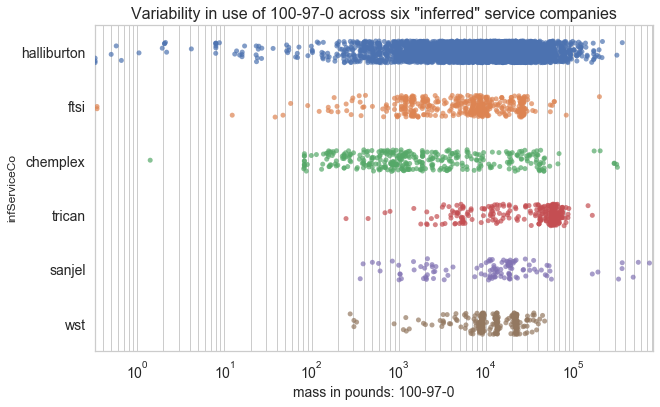

In [26]:
sns.set(style="whitegrid")
ops =df.groupby('infServiceCo',as_index=False)['bgMass'].sum().sort_values(by='bgMass',
                                                                             ascending=False)[:6].infServiceCo.tolist()
#print(ops)
t = df[df.infServiceCo.isin(ops)]
#print(len(t))
t = t[t.record_flags.str.contains('M')]
fig = plt.figure(figsize=(10,6))
ax = sns.stripplot(t.bgMass,t.infServiceCo,jitter=.2,alpha=.7)
plt.xlabel(f'mass in pounds: {cas}',fontsize=14);
plt.title(f'Variability in use of {cas} across six "inferred" service companies',fontsize=16)
ax.set(xscale='log')
ax.set(xlim=(max(0.1,t.bgMass.min()),t.bgMass.max()*1.1))
ax.tick_params(axis="x", labelsize=14)
ax.tick_params(axis="y", labelsize=14)
locmaj = matplotlib.ticker.LogLocator(base=10,subs='all') 
ax.xaxis.set_major_locator(locmaj)

# What are the big uses?

In [27]:
perc90_mass = np.percentile(df[df.bgMass>0].bgMass,90)
perc90_str = str(round_sig(perc90_mass,1))
md(f'### --- Upper 10% of records are over {perc90_str} pounds')

### --- Upper 10% of records are over 30,000 pounds

# Are the big uses changing over time?

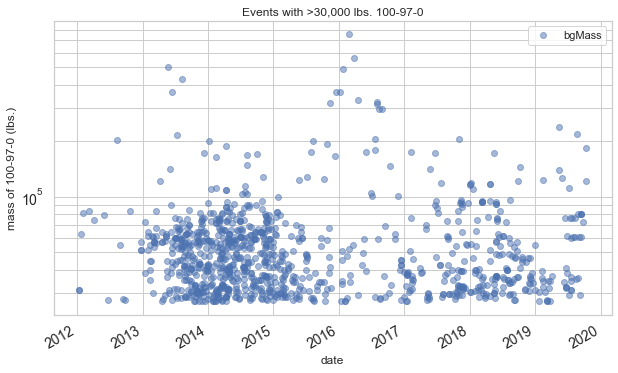

In [28]:
ax = df[df.bgMass>perc90_mass].plot('date','bgMass',title=f'Events with >{perc90_str} lbs. {cas}',
                                    style='o',alpha=.5,
                                    figsize=(10,6))
ax.set(yscale='log')
ax.tick_params(axis="y", labelsize=14)
ax.tick_params(axis="x", labelsize=14)
#locmaj = matplotlib.ticker.LogLocator(base=10,numticks=7,subs='all') 
locmaj = matplotlib.ticker.LogLocator(base=10,subs='all') 
ax.yaxis.set_major_locator(locmaj)
#ax.set(ylim=(10000,1000000));
plt.ylabel(f'mass of {cas} (lbs.)');

#  Where are those big uses?

<Figure size 432x288 with 0 Axes>

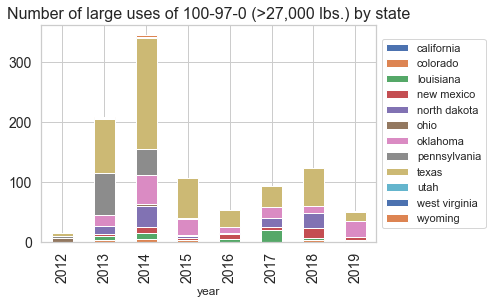

In [29]:
t = df[df.bgMass>perc90_mass].copy()
bg = t.groupby(['year','bgStateName'],as_index=False)['bgMass'].count()
piv = pd.pivot(bg,index='year',columns='bgStateName',values='bgMass')
piv.reset_index(inplace=True)
fig = plt.figure();
ax=piv.plot.bar(x='year',stacked=True);
ax.tick_params(axis="y", labelsize=14);
ax.tick_params(axis="x", labelsize=14);
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));
plt.title(f'Number of large uses of {cas} (>{round_sig(perc90_mass)} lbs.) by state',fontsize=16);